# Klasifikasi Data Non Stemming

In [42]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset preprocessing.csv')
df.head()

,id,fulltext,label
0,0,hari masih nunggu kurir pick up pesanan suda...,negatif
1,1,mau bayar bpjs kok gini mulu,negatif
2,2,belum adacek dm sudah saya kirim nya,negatif
3,3,astaghfirullah min cek dm masya allah dari ta...,negatif
4,4,aku juga gtu kak padahal saldo pelatihannya ...,negatif


In [43]:
import string
df['label'].value_counts()

negatif    694
netral     284
positif    210
Name: label, dtype: int64

In [44]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['min','tokopediacare', 'tokopedia', 'hai', 'halo', 'sih', 'nih', 'yg', 'kak', 'ni', 'jd', 'walopun','tuh']

stopword = stop_factory + more_stopword
print (stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['fulltext']) 
bow_transformer.vocabulary_

{'hari': 1104,
 'masih': 1701,
 'nunggu': 2081,
 'kurir': 1535,
 'pick': 2335,
 'up': 3157,
 'pesanan': 2322,
 'sudah': 2821,
 'tidak': 3011,
 'bisa': 386,
 'dibatalkan': 638,
 'harusnya': 1106,
 'tokopedia': 3050,
 'ganti': 986,
 'ekspedisi': 874,
 'lain': 1550,
 'selain': 2645,
 'anteraja': 114,
 'dulu': 858,
 'pernah': 2308,
 'ada': 13,
 'trus': 3100,
 'sekarang': 2635,
 'gak': 974,
 'lagi': 1547,
 'mau': 1721,
 'bayar': 259,
 'bpjs': 427,
 'kok': 1476,
 'gini': 1016,
 'mulu': 1937,
 'belum': 292,
 'adacek': 15,
 'dm': 816,
 'saya': 2579,
 'kirim': 1448,
 'nya': 2084,
 'astaghfirullah': 149,
 'min': 1881,
 'cek': 498,
 'masya': 1717,
 'allah': 76,
 'dari': 569,
 'tadi': 2847,
 'dan': 560,
 'mention': 1831,
 'ga': 961,
 'diwaro': 812,
 'aku': 62,
 'juga': 1275,
 'gtu': 1044,
 'kak': 1294,
 'padahal': 2158,
 'saldo': 2550,
 'pelatihannya': 2217,
 'berkurang': 335,
 'berhasil': 322,
 'statusnya': 2804,
 'di': 613,
 'dashboard': 573,
 'prakerja': 2387,
 'ya': 3241,
 'uang': 3129,
 'tert

In [46]:
tokens = bow_transformer.get_feature_names()
print(tokens)

['aaah', 'aamiin', 'abaikan', 'abalabal', 'abang', 'abg', 'abis', 'abjad', 'about', 'academy', 'access', 'account', 'acount', 'ada', 'adaapa', 'adacek', 'adalah', 'adik', 'adil', 'adlh', 'admin', 'adminkalo', 'adminmau', 'adminnya', 'aduh', 'ae', 'aelah', 'agak', 'agar', 'agen', 'agent', 'agentcs', 'ah', 'ahh', 'aing', 'air', 'aj', 'aja', 'ajaa', 'ajabisa', 'ajadah', 'ajah', 'ajaib', 'ajak', 'ajalah', 'ajukan', 'ajwmue', 'akademi', 'akademinya', 'akan', 'akhir', 'akhiri', 'akhirnya', 'akses', 'aksesoris', 'aksinya', 'aktif', 'aktifin', 'aktifjadi', 'aktifnya', 'aktiftks', 'aktivasi', 'aku', 'akulaku', 'akun', 'akunnya', 'akuuuuu', 'alah', 'alamat', 'alasan', 'alasannya', 'alesannya', 'alfamart', 'alhamdulillaaah', 'alhamdulillah', 'alias', 'allah', 'aluminium', 'alwayscare', 'ama', 'aman', 'amanalwayscare', 'amat', 'ambil', 'amer', 'amiin', 'amiinn', 'aminnn', 'amp', 'ampe', 'ampinstal', 'amu', 'an', 'anak', 'anda', 'andai', 'andri', 'android', 'androidnya', 'ane', 'aneh', 'anggap', 'a

In [47]:
text_bow = bow_transformer.transform(df['fulltext'])
print(text_bow)

  (0, 13)	2
  (0, 114)	1
  (0, 386)	1
  (0, 638)	1
  (0, 858)	1
  (0, 874)	1
  (0, 974)	1
  (0, 986)	1
  (0, 1104)	1
  (0, 1106)	1
  (0, 1535)	1
  (0, 1547)	1
  (0, 1550)	1
  (0, 1701)	1
  (0, 2081)	1
  (0, 2308)	1
  (0, 2322)	1
  (0, 2335)	1
  (0, 2635)	1
  (0, 2645)	1
  (0, 2821)	2
  (0, 3011)	1
  (0, 3050)	1
  (0, 3100)	1
  (0, 3157)	1
  :	:
  (1186, 560)	1
  (1186, 609)	1
  (1186, 723)	1
  (1186, 730)	1
  (1186, 795)	1
  (1186, 1045)	1
  (1186, 1547)	2
  (1186, 1684)	1
  (1186, 2113)	1
  (1186, 2301)	1
  (1186, 2679)	1
  (1186, 3041)	1
  (1187, 181)	1
  (1187, 290)	1
  (1187, 481)	1
  (1187, 613)	1
  (1187, 1216)	1
  (1187, 1310)	1
  (1187, 1457)	1
  (1187, 2084)	1
  (1187, 2269)	1
  (1187, 2314)	1
  (1187, 2579)	2
  (1187, 2854)	1
  (1187, 3011)	1


In [48]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1188, 3270)

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)  

TfidfTransformer()
  (0, 3157)	0.20421320896871342
  (0, 3100)	0.2297319193196161
  (0, 3050)	0.1253808216423271
  (0, 3011)	0.14064619003926654
  (0, 2821)	0.24466338067969298
  (0, 2645)	0.27759925162973853
  (0, 2635)	0.18348758046104172
  (0, 2335)	0.24391253702698049
  (0, 2322)	0.17771546045491848
  (0, 2308)	0.19492519210163342
  (0, 2081)	0.20636280374222507
  (0, 1701)	0.17174056789271697
  (0, 1550)	0.19330219865008524
  (0, 1547)	0.15293884148502881
  (0, 1535)	0.20421320896871342
  (0, 1106)	0.2339208235849268
  (0, 1104)	0.16268437569741334
  (0, 986)	0.20636280374222507
  (0, 974)	0.14464755707683502
  (0, 874)	0.22248321194433512
  (0, 858)	0.20863529758906751
  (0, 638)	0.20863529758906751
  (0, 386)	0.1133002123981912
  (0, 114)	0.2297319193196161
  (0, 13)	0.2212562782439603
  :	:
  (1186, 2301)	0.31690163651335196
  (1186, 2113)	0.22033084253494423
  (1186, 1684)	0.29950891672252644
  (1186, 1547)	0.33001923794143273
  (1186, 1045)	0.26977586585279834
  (1186, 795)	0

In [50]:
dd=pd.DataFrame(data=tweet_tfidf.toarray(),columns=tokens)
dd

,aaah,aamiin,abaikan,abalabal,abang,abg,abis,abjad,about,academy,...,yen,yes,yg,yh,yo,yok,yoongi,you,yuhuu,yuk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.139306,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df.label,test_size=0.1, random_state=35)

In [52]:
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 3270)
(119, 3270)
(1069,)
(119,)


In [53]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)

In [54]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0      negatif
1      negatif
2      negatif
3      negatif
4       netral
5      negatif
6      negatif
7      negatif
8      negatif
9      negatif
10     negatif
11     negatif
12     negatif
13      netral
14     negatif
15     negatif
16     negatif
17     negatif
18     negatif
19     negatif
20     negatif
21     negatif
22     negatif
23     positif
24     negatif
25     negatif
26     negatif
27     negatif
28     positif
29     positif
30     negatif
31     negatif
32      netral
33     positif
34     negatif
35     negatif
36      netral
37     negatif
38     negatif
39     negatif
40     negatif
41      netral
42     negatif
43     negatif
44     positif
45     negatif
46     negatif
47     negatif
48     negatif
49     negatif
50     negatif
51      netral
52      netral
53      netral
54      netral
55     positif
56      netral
57     negatif
58     negatif
59      netral
60     negatif
61     positif
62     negatif
63     positif
64     negatif
65     negatif
66     neg

In [55]:
true_label= pd.Series(y_test)
print(true_label.to_string())

580     negatif
621     negatif
707     negatif
474     positif
548      netral
383      netral
708     negatif
839     negatif
1159    negatif
112     negatif
1039    positif
653     negatif
510     negatif
717     negatif
1052    negatif
160     negatif
974     negatif
313     negatif
628     negatif
913     negatif
440     negatif
362      netral
903     negatif
1043    positif
70      negatif
344     negatif
432      netral
799     negatif
54      positif
803     positif
500     negatif
589     negatif
42      positif
923     positif
1186    negatif
241     negatif
1034    negatif
1075    negatif
1047    negatif
667     positif
224     negatif
905      netral
286     negatif
403     negatif
114     negatif
1111    negatif
689     negatif
922     negatif
866      netral
18      negatif
326     negatif
1167     netral
925      netral
189     negatif
697      netral
570     positif
1187     netral
651     negatif
117     negatif
967      netral
576      netral
826     negatif
805     

test time:  0.008s
accuracy:   0.748
              precision    recall  f1-score   support

     negatif       0.78      0.87      0.82        71
      netral       0.73      0.59      0.65        27
     positif       0.65      0.52      0.58        21

    accuracy                           0.75       119
   macro avg       0.72      0.66      0.68       119
weighted avg       0.74      0.75      0.74       119



Text(33.0, 0.5, 'Label sebenarnya')

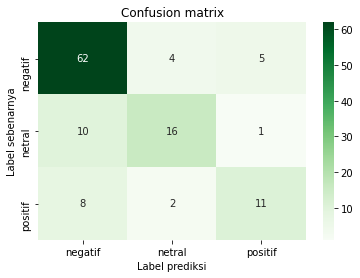

In [56]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from pandas import DataFrame

t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')

# Klasifikasi Data Hasil Stemming

In [57]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset preprocessing + stemming.csv')
df.head()

,id,fulltext,label
0,0,hari masih nunggu kurir pick up pesan sudah ti...,negatif
1,1,mau bayar bpjs kok gin mulu,negatif
2,2,belum adacek dm sudah saya kirim nya,negatif
3,3,astaghfirullah min cek dm masya allah dari tad...,negatif
4,4,aku juga gtu kak padahal saldo latih sudah kur...,negatif


In [58]:
df.shape

(1188, 3)

In [59]:
import string
df['label'].value_counts()

negatif    694
netral     284
positif    210
Name: label, dtype: int64

In [60]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['min','tokopediacare', 'tokopedia', 'hai', 'halo', 'sih', 'nih', 'yg', 'kak', 'ni', 'jd', 'walopun','tuh']

stopword = stop_factory + more_stopword
print (stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['fulltext'])
bow_transformer.vocabulary_

{'hari': 882,
 'masih': 1386,
 'nunggu': 1649,
 'kurir': 1227,
 'pick': 1807,
 'up': 2503,
 'pesan': 1798,
 'sudah': 2222,
 'tidak': 2365,
 'bisa': 308,
 'batal': 227,
 'harus': 883,
 'tokopedia': 2401,
 'ganti': 776,
 'ekspedisi': 664,
 'lain': 1239,
 'selain': 2068,
 'anteraja': 111,
 'dulu': 647,
 'pernah': 1792,
 'ada': 13,
 'trus': 2448,
 'sekarang': 2061,
 'gak': 764,
 'lagi': 1237,
 'mau': 1401,
 'bayar': 235,
 'bpjs': 347,
 'kok': 1176,
 'gin': 806,
 'mulu': 1511,
 'belum': 260,
 'adacek': 14,
 'dm': 607,
 'saya': 2029,
 'kirim': 1151,
 'nya': 1652,
 'astaghfirullah': 142,
 'min': 1462,
 'cek': 414,
 'masya': 1397,
 'allah': 70,
 'dari': 488,
 'tadi': 2249,
 'dan': 479,
 'mention': 1436,
 'ga': 751,
 'diwaro': 603,
 'aku': 56,
 'juga': 1036,
 'gtu': 833,
 'kak': 1057,
 'padahal': 1721,
 'saldo': 2003,
 'latih': 1262,
 'kurang': 1226,
 'hasil': 884,
 'status': 2205,
 'di': 529,
 'dashboard': 493,
 'prakerja': 1856,
 'ya': 2586,
 'uang': 2476,
 'tahan': 2253,
 'jt': 1029,
 'tarik

In [62]:
tokens = bow_transformer.get_feature_names()
print(tokens)

['aaah', 'aamiin', 'abai', 'abalabal', 'abang', 'abg', 'abis', 'abjad', 'about', 'academy', 'access', 'account', 'acount', 'ada', 'adacek', 'adalah', 'adik', 'adil', 'adlh', 'admin', 'adminnya', 'adu', 'aduh', 'ae', 'aelah', 'agak', 'agar', 'agen', 'agent', 'agentcs', 'ah', 'ahh', 'ain', 'aing', 'air', 'aj', 'aja', 'ajaa', 'ajadah', 'ajah', 'ajaib', 'ajak', 'ajar', 'aju', 'ajwmue', 'akademi', 'akan', 'akhir', 'akses', 'aksesoris', 'aksi', 'aktif', 'aktifin', 'aktifjadi', 'aktiftks', 'aktivasi', 'aku', 'akulaku', 'akun', 'akuuuuu', 'alah', 'alam', 'alamat', 'alami', 'alas', 'alesannya', 'alfamart', 'alhamdulillaaah', 'alhamdulillah', 'alias', 'allah', 'aluminium', 'alwayscar', 'alwayscare', 'ama', 'aman', 'amanalwayscare', 'amat', 'ambil', 'amer', 'amiin', 'amiinn', 'aminnn', 'amp', 'ampe', 'ampinstal', 'amu', 'an', 'anak', 'ancam', 'anda', 'andai', 'andri', 'android', 'androidnya', 'ane', 'aneh', 'anggap', 'anggota', 'anggur', 'angin', 'angkat', 'angus', 'anjing', 'anjir', 'anjrit', 'a

In [63]:
text_bow = bow_transformer.transform(df['fulltext'])
print(text_bow)

  (0, 13)	2
  (0, 111)	1
  (0, 227)	1
  (0, 308)	1
  (0, 647)	1
  (0, 664)	1
  (0, 764)	1
  (0, 776)	1
  (0, 882)	1
  (0, 883)	1
  (0, 1227)	1
  (0, 1237)	1
  (0, 1239)	1
  (0, 1386)	1
  (0, 1649)	1
  (0, 1792)	1
  (0, 1798)	1
  (0, 1807)	1
  (0, 2061)	1
  (0, 2068)	1
  (0, 2222)	2
  (0, 2365)	1
  (0, 2401)	1
  (0, 2448)	1
  (0, 2503)	1
  :	:
  (1186, 256)	1
  (1186, 479)	1
  (1186, 526)	1
  (1186, 570)	1
  (1186, 573)	1
  (1186, 834)	1
  (1186, 1237)	2
  (1186, 1372)	1
  (1186, 1680)	1
  (1186, 1789)	1
  (1186, 2093)	1
  (1186, 2394)	2
  (1187, 172)	1
  (1187, 259)	1
  (1187, 399)	1
  (1187, 529)	1
  (1187, 987)	1
  (1187, 1072)	1
  (1187, 1158)	1
  (1187, 1652)	1
  (1187, 1775)	1
  (1187, 1795)	1
  (1187, 2029)	2
  (1187, 2255)	1
  (1187, 2365)	1


In [64]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1188, 2614)

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 2503)	0.2090631800853821
  (0, 2448)	0.23518794823617697
  (0, 2401)	0.1277729082120418
  (0, 2365)	0.14398647327953648
  (0, 2222)	0.2499295139898873
  (0, 2068)	0.28419210798419375
  (0, 2061)	0.18659285774779516
  (0, 1807)	0.24970534918417778
  (0, 1798)	0.16808416452283798
  (0, 1792)	0.19789303821906287
  (0, 1649)	0.2112638267600745
  (0, 1386)	0.17581932850789128
  (0, 1239)	0.19476056617263654
  (0, 1237)	0.15598541853038245
  (0, 1227)	0.19955457702917184
  (0, 883)	0.18784532729826914
  (0, 882)	0.1629437511607366
  (0, 776)	0.19476056617263654
  (0, 764)	0.14808287096990846
  (0, 664)	0.22776708734751247
  (0, 647)	0.2135902913053632
  (0, 308)	0.11491704607414992
  (0, 227)	0.19955457702917184
  (0, 111)	0.23518794823617697
  (0, 13)	0.2257010168256052
  :	:
  (1186, 2093)	0.24546928261899556
  (1186, 1789)	0.31910386067213625
  (1186, 1680)	0.21753898683879325
  (1186, 1372)	0.3015902747724079
  (1186, 1237)	0.3310696104037032
  (1186, 834)	0.2716

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df.label,test_size=0.1, random_state=35)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 2614)
(119, 2614)
(1069,)
(119,)


In [68]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)

In [69]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0      negatif
1      negatif
2      negatif
3       netral
4       netral
5      negatif
6      negatif
7      negatif
8      negatif
9      negatif
10     negatif
11     negatif
12     negatif
13     negatif
14     negatif
15     negatif
16     negatif
17     negatif
18     negatif
19     negatif
20     negatif
21     negatif
22     negatif
23     positif
24     negatif
25     negatif
26     negatif
27     negatif
28     positif
29     positif
30     negatif
31     negatif
32     positif
33     positif
34     negatif
35     negatif
36     negatif
37     negatif
38     negatif
39     negatif
40     negatif
41      netral
42     negatif
43     negatif
44      netral
45     negatif
46     negatif
47     negatif
48     negatif
49     negatif
50     negatif
51      netral
52      netral
53      netral
54     negatif
55      netral
56      netral
57     negatif
58     negatif
59      netral
60     negatif
61     positif
62     negatif
63     negatif
64     negatif
65     negatif
66     neg

In [70]:
true_label= pd.Series(y_test)
print(true_label.to_string())

580     negatif
621     negatif
707     negatif
474     positif
548      netral
383      netral
708     negatif
839     negatif
1159    negatif
112     negatif
1039    positif
653     negatif
510     negatif
717     negatif
1052    negatif
160     negatif
974     negatif
313     negatif
628     negatif
913     negatif
440     negatif
362      netral
903     negatif
1043    positif
70      negatif
344     negatif
432      netral
799     negatif
54      positif
803     positif
500     negatif
589     negatif
42      positif
923     positif
1186    negatif
241     negatif
1034    negatif
1075    negatif
1047    negatif
667     positif
224     negatif
905      netral
286     negatif
403     negatif
114     negatif
1111    negatif
689     negatif
922     negatif
866      netral
18      negatif
326     negatif
1167     netral
925      netral
189     negatif
697      netral
570     positif
1187     netral
651     negatif
117     negatif
967      netral
576      netral
826     negatif
805     

test time:  0.009s
accuracy:   0.765
              precision    recall  f1-score   support

     negatif       0.78      0.90      0.84        71
      netral       0.68      0.56      0.61        27
     positif       0.80      0.57      0.67        21

    accuracy                           0.76       119
   macro avg       0.75      0.68      0.71       119
weighted avg       0.76      0.76      0.76       119



Text(33.0, 0.5, 'Label sebenarnya')

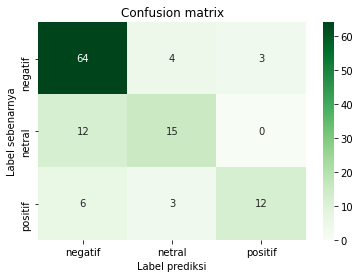

In [71]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from pandas import DataFrame


t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')


# Mengetes Data Inputan Langsung

In [1]:
user_data = ["baik terimakasih"]
print(user_data)

['baik terimakasih']


In [2]:
test_1_unseen =  bow_transformer.transform(user_data)
data=test_1_unseen.toarray()
print("diubah menjadi array: \n ",data)

NameError: name 'bow_transformer' is not defined

In [35]:
print("ukuran dari array: \n ",data.shape)

ukuran dari array: 
  (1, 2614)


In [36]:
prediction_unseen = model.predict(data)
print(prediction_unseen)

['positif']


In [37]:
import csv
with open('prediksi-langsung.csv', 'a+', newline='') as file:
    writer = csv.writer(file)
    #writer.writerow(dataset)
    writer.writerow([user_data,prediction_unseen])